# MACHINE LEARNING APPROACH FOR LOW BIRTH WEIGHT PREDICTION
## OVERVIEW
**Low birth weight(LBW) is a critical issue that affects new born infants all over the world. It has been linked to infant mortality. Predicting LBW is a valuable preventative tool and predictor of newborn health risks. The capstone project employed a machine learning model to predict LBW.**

## OBJECTIVES
**To identify the key maternal factors influencing likelihood of low birth weight**

**To investigate the relationship between low birth weight and maternal history**

## HYPOTHESIS
**Null Hypothesis: There is no relationship between demographic factors and low birth weight**

**Alternative hypothesis: There is a relationship between demographic and low birth weight**

## DATA PREPARATION AND ANALYSIS
|                      Explanatory Variable                  |                        Unit                          |
| ---------------------------------------------------------- | ---------------------------------------------------- | 
|                     bweight - birthweight                  |                         grams                        |
|           gest_age - duration of the pregnancy             |                       float                          |
|           age - age of the mother during pregnancy         |                       float                          |          |       distance - distance from ressidence to the facility  |                       float                          |          
|       tt_arrv - if mother is on Anti-retroviral therapy    |                       integer                        |
|       covid - if mother has any past diagnosis of covid    |                       integer                        |
|       hivtest - if mother has ever tested for HIV          |                       integer                        |

## Importing necessary libraries

In [1]:
import pandas as pd

C:\Users\Esinta Mphongolo\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


## Importing the dataset file
***The dataset 'matsurvey_dta.csv' contains data collected by Kamuzu University of Health Sciences' Women in Science project. It contains data of martenal factors(socio-demographic and behavioral) affecting birth weight of infants***

In [2]:
df =pd.read_csv('matsurvey_dta.csv')

## Viewing first few rows of the dataset

In [3]:
df.head()

,Unnamed: 0,facility_name,age,ward,doadmin,vdrl,hivtest,covid,nearmiss,babies,b1bweight,Zone,gest_age,dist,tt_arrv
0,1,Bwaila,22.562628,7,2020-10-04,99,0,0,1,1,3000,Central West,39.793851,13.450458,16.220360
1,2,Bwaila,28.772074,7,2020-10-06,0,0,0,1,1,3500,Central West,38.017257,3.982630,10.117301
2,3,Bwaila,23.819302,7,2020-10-08,0,0,0,1,1,3500,Central West,39.079171,5.581858,9.080061
3,4,Bwaila,29.702943,2,2020-10-16,0,0,0,1,1,4100,Central West,43.721149,8.592800,17.178469
4,5,Bwaila,21.798768,7,2020-10-18,99,0,0,1,1,2800,Central West,39.422272,13.623117,16.358216


## Viewing the last 60 rows of the dataset

In [4]:
df.tail(60)

,Unnamed: 0,facility_name,age,ward,doadmin,vdrl,hivtest,covid,nearmiss,babies,b1bweight,Zone,gest_age,dist,tt_arrv
996,997,Balaka,25.000000,2,2021-12-12,0,0,0,1,1,3600,South East,42.703930,11.652510,15.479578
997,998,Balaka,37.000000,2,2021-12-25,0,0,0,1,1,2500,South East,35.988671,9.539248,18.275706
998,999,Balaka,44.000000,2,2021-12-24,0,0,0,1,1,3500,South East,38.438300,4.232044,10.329406
999,1000,Balaka,17.000000,2,2022-01-08,99,0,0,1,1,3400,South East,36.385950,2.868892,8.526999
1000,1001,Balaka,34.000000,6,2022-01-06,0,0,1,0,2,2800,South East,36.853816,3.983051,10.284153
1001,1002,Balaka,16.339493,7,2022-02-17,0,0,0,1,1,2000,South East,41.458548,7.962132,8.386120
1002,1003,Balaka,19.069131,2,2022-02-27,0,0,0,1,1,2700,South East,40.435130,10.272914,13.218406
1003,1004,Balaka,16.000000,1,2022-02-28,0,0,0,1,1,2100,South East,35.685195,5.749251,13.233266
1004,1005,Balaka,23.000000,1,2022-02-28,0,0,0,1,1,2700,South East,38.708827,14.324820,19.443771
1005,1006,Balaka,17.000000,2,2022-03-06,0,0,0,1,1,2800,South East,39.766703,1.775349,7.929781


## Checking dataset information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056 entries, 0 to 1055
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1056 non-null   int64  
 1   facility_name  1056 non-null   object 
 2   age            1056 non-null   float64
 3   ward           1056 non-null   int64  
 4   doadmin        1056 non-null   object 
 5   vdrl           1056 non-null   int64  
 6   hivtest        1056 non-null   int64  
 7   covid          1056 non-null   int64  
 8   nearmiss       1056 non-null   int64  
 9   babies         1056 non-null   int64  
 10  b1bweight      1056 non-null   int64  
 11  Zone           1056 non-null   object 
 12  gest_age       1056 non-null   float64
 13  dist           1056 non-null   float64
 14  tt_arrv        1056 non-null   float64
dtypes: float64(4), int64(8), object(3)
memory usage: 111.4+ KB


## Checking the summary statistics

In [42]:
#includes measures of central tendency
df.describe()

,Unnamed: 0,age,ward,vdrl,hivtest,covid,nearmiss,babies,b1bweight,gest_age,dist,tt_arrv
count,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,528.500000,26.565001,4.200758,23.090909,7.074811,0.161932,0.866477,1.047348,2793.590909,38.930924,7.507421,13.326313
std,304.985246,7.233237,2.487398,41.853132,25.430233,0.368563,0.340300,0.216899,709.853763,2.379665,4.327559,4.032582
min,1.000000,10.841889,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,99.000000,32.196144,0.019720,2.894980
25%,264.750000,20.292266,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2450.000000,36.954185,3.902677,10.293124
50%,528.500000,25.472964,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2900.000000,39.024330,7.279963,13.284893
75%,792.250000,32.000000,7.000000,1.000000,0.000000,0.000000,1.000000,1.000000,3200.000000,40.828696,11.251302,16.560409
max,1056.000000,51.115674,7.000000,99.000000,99.000000,1.000000,1.000000,3.000000,4800.000000,44.437234,14.998959,23.091507


## CORRELATION

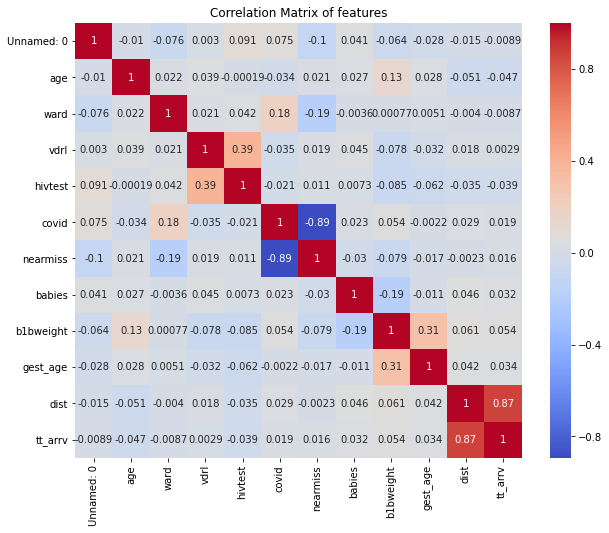

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of features')
plt.show()

**Correlation ranges from -1 to +1. Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases**

## Feature Selection
***selecting the most important features from our dataset to improve model performance***

In [7]:
features = ['age', 'hivtest','covid','gest_age', 'tt_arrv', 'dist']
x=df[features]
y=df['b1bweight']

## Importing sckit-learn 
***for splitting the dataset and training our model***

In [8]:
from sklearn.model_selection import train_test_split

## Splitting the dataset
***Training_size = 80%***
***Testing_size = 20%***

**This will help us determine the accuracy of the model**

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

***Verifying the dimensions of our train and test sets***

In [10]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(844, 6) (212, 6) (844,) (212,)


## Performing Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model= LinearRegression()

**Training the model**

In [13]:
model.fit(x_train, y_train)

LinearRegression()

In [27]:
coefficient = model.coef_
print('Coefficients:', coefficient)

Coefficients: [11.45911319 -2.10407408 75.94124905 87.5093549  -7.30474854 13.49192388]


## Interpretation
*Age: For every additional year in the maternal age, birth-weight increases by 11.30 grams keeping all other factors constant*

*HIV Test: If HIV Test is positive(1 vs 0), birth-weight **decreases** with 2.10 grams keeping all other factors constant. This shows a weak negative relationship*

*Covid: If COVID history is present, birth-weight increases with 75.94 keeping all other factors constant*

*Gestation period: For each additional week during gestation , birth-weight increases by 87.50 grams keeping all other factors constant*. *This show a positive relationship as longer gestation periods increases the probability of higher birth weight*

*Anti-retroviral Therapy: For every unit increase in ARVs, birth-weight **decreases** by 7.3 keeping all other factors constant*

*Distance: For every unit increase in distance to the health facility, birth-weight increases by 13.5 keeping all other factors constant*

In [15]:
intercept = model.intercept_

## Finding the intercept

In [28]:
print(intercept)

-938.7775357798478


**Interpretation**

*The value of our independent variables is -938.77 when the birth-weight is 0*

## Model Predictions

*Predictions from the x_test*

In [17]:
y_pred = model.predict(x_test)
print(y_pred)

[2639.68467081 2648.83168788 2945.99409237 2783.6299895  2644.68737449
 2688.01090255 2702.22214006 2975.32689621 2968.39713571 2875.5314366
 2790.52054486 2952.11468268 2500.34100265 2570.53423633 2767.67309953
 2312.48282013 2895.58715027 3150.30572793 2436.7914263  3051.42366823
 2549.49266833 2729.88949625 3080.18708884 2949.74548694 2786.2485617
 3144.14607285 2516.93376373 2972.54473762 2730.44306618 3223.12159394
 2999.0318278  2940.9360349  2699.52470355 3170.49154822 2967.78292595
 2149.49711101 2614.9529395  2638.36435528 2487.17563767 2635.23171064
 2785.03170261 2769.69347288 2285.62920637 2874.20982716 2864.45831242
 2705.53342697 3038.1455216  2719.31705374 3242.38581327 2553.75428184
 2748.84399776 2775.74435896 2632.12000919 2819.93843583 2285.49551117
 3220.69130818 2559.73481626 3109.90347106 3044.95087334 3052.05807035
 2716.03384677 2763.40402976 2374.66744758 2596.68277109 2677.83598509
 2650.13305211 2720.75434736 2727.01708066 2883.89376235 2355.1314596
 2554.736

## Visualization of model predictions

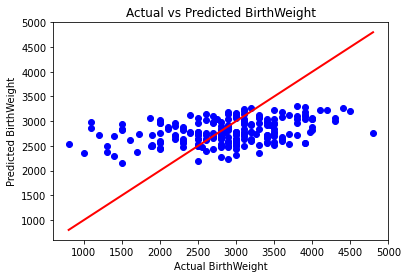

In [29]:
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual BirthWeight')
plt.ylabel('Predicted BirthWeight')
plt.title('Actual vs Predicted BirthWeight')
plt.show()

***Interpretation***


**The points close to the red line indicate accurate predictions.** 

**In our case there is some clustering around the line whch means it is closely a good fit.** 

**Most of the points are near around or slightly over 3000 grams, this means the model evaluates normal weights well but struggles with low or higher birth weights.** 

## Finding the best fit


In [32]:
from sklearn.metrics import r2_score, mean_squared_error

In [36]:
#calculating R-square
r2 = r2_score(y_pred, y_test)
print("R-Squared:", r2)

R-Squared: -6.559845206350134


In [37]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 456985.7774726185


## LIMITATIONS
**1. The assumptions of linear regression may not have been met**

**2. Overfitting; the model is too complex and fitting the noise in the data rather than the underlying pattern**

## MITIGATING BIAS
**Oversampling minority class due to imbalanced data(very few low birth weights)**

**Use non-linear models and include interaction terms**

## CONCLUSION
**Maternal factors influence likelihood of low birth weight because they are moderately/slightly positively correlated with low birth weight**. **It means that these maternal factors do not have drastic effects on prediction of birth-weight**

**There is also relationship between low birth weight and maternal history because hivtest','covid','gest_age', 'tt_arrv parameters are correlated to low birth weight**

**Further investigation is needed to be done because the value of R-square is an indication that something is not entire appropriate with the model or data. High MSE indicates that predicting low birth weights rather requires non-linear models in order to predict values closer to the actual values.**
